# DENSITY-BASED CLUSTERING

### NAME : Siddharth Kanikdale
### ROLLNO : 110
### PRN : 0120190145
### SEAT NO : T214027

#### Importing pandas library to accept the dataset

In [1]:
import pandas as pd

#### Displaying and understanding the dataset

#### The dataset that is used in this algorithm is Customer_Data the spending amount by the customers according to the income recieved by them annually. There also exist some people who do not have any income source but spend higher amount of money, also there are some people whos spending score isn't mentioned.

#### The dataset consists of 5 columns customerID, Gender, Annual Income and Spending score.

In [2]:
data = pd.read_csv('Customer_Data.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Female,24,14.0,59.0
2,3,Female,20,16.0,6.0
3,4,Male,20,NaN,NaN
4,5,Female,31,17.0,40.0
5,6,Female,22,17.0,76.0
6,7,Female,35,18.0,6.0
7,8,Female,23,18.0,94.0
8,9,Male,64,19.0,3.0
9,10,Female,30,19.0,72.0


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,220.000000,220.000000,215.000000,217.000000
mean,110.500000,38.786364,58.720930,51.497696
std,63.652704,14.374788,27.179161,25.983457
min,1.000000,14.000000,0.000000,0.000000
25%,55.750000,28.000000,39.000000,35.000000
50%,110.500000,36.000000,60.000000,51.000000
75%,165.250000,49.000000,77.000000,73.000000
max,220.000000,77.000000,137.000000,99.000000


#### Visualizing the data and considering the appropriate columns for the algorithm

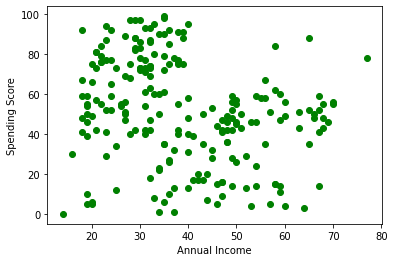

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(data[['Age']], data[['Spending Score (1-100)']], color='g')

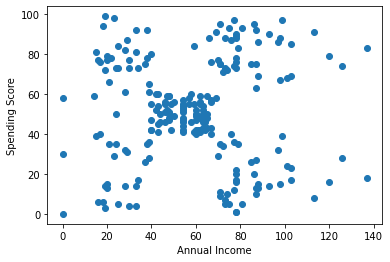

In [5]:
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(data[['Annual Income (k$)']], data[['Spending Score (1-100)']])

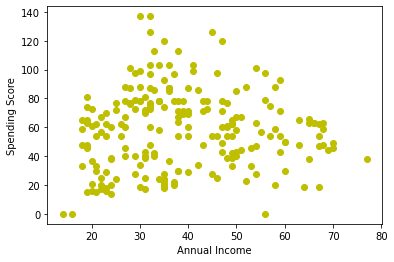

In [6]:
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(data[['Age']], data[['Annual Income (k$)']], color='y')

In [7]:
data.isnull().sum()

CustomerID                0
Genre                     1
Age                       0
Annual Income (k$)        5
Spending Score (1-100)    3
dtype: int64

In [8]:
C_data = data.dropna(axis=0, how='any')
C_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
X = C_data.iloc[:, [3, 4]].values

In [10]:
from sklearn.cluster import DBSCAN
dbScan = DBSCAN(eps = 4, min_samples = 4)

In [11]:
model = dbScan.fit(X)
model

DBSCAN(eps=4, min_samples=4)

In [12]:
labels = model.labels_
labels

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,
        2,  2, -1, -1, -1, -1,  4,  3,  4,  3, -1,  3,  4,  5,  4,  3,  4,
        3,  4, -1, -1,  5,  4, -1, -1, -1,  6,  5,  6,  5,  6,  3,  6,  5,
       -1,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  7, -1,  7, -1,
        7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1,  3,
        3, -1, -1, -1,  2,  2,  3, -1, -1, -1], dtype=int64)

In [13]:
num = len(set(labels))
num

9

In [14]:
from pandas import DataFrame

numbers = []
colors = ['black', 'lime', 'yellow', 'orange', 'green', 'red', 'cyan', 'fuchsia', 'darkolivegreen', 'saddlebrown', 'silver', 'tomato', 'royalblue']
a = {}
def showCluster(X, cluster):
    df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label = cluster))
    for i in range(num):
        numbers.append(i)
    numbers.insert(0, -1)
    
    for i in range(num):
        a[numbers[i]] = colors[i]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=a[key])
    plt.show()

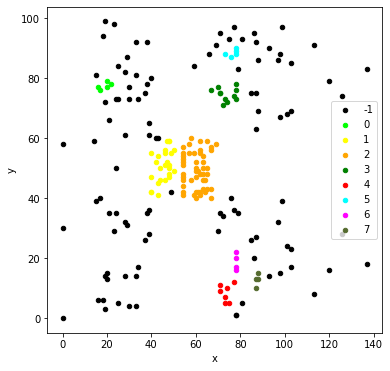

In [15]:
showCluster(X, labels)

In [16]:
from sklearn import metrics

print(metrics.silhouette_score(X, labels))

-0.04184489586560686
